<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/polyhedron-gdl/unibo-intensive-program-2023/blob/main/1-notebooks/chapter-2-4.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Convnet in Finance

Convolutional neural networks (CNNs) have been applied to a variety of finance-related tasks, such as stock price prediction, fraud detection, and risk assessment. Here's a simple example of how a CNN could be used for stock price prediction.

In [31]:
# if you are in google colab probably you need to install yfinance
#!pip install yfinance

In [3]:
import yfinance as yf
import pandas   as pd
import numpy    as np

## Download Stock Prices

Here's an example Python code that uses the yfinance library to download stock prices for a specified set of tickers, and saves the results to a CSV file:

In [14]:
# Define a list of tickers to download
#tickers = ["AAPL", "MSFT", "AMZN"]
tickers = ["AAPL"]

# Define start and end dates
start_date = "2020-01-01"
end_date   = "2021-12-31"

# Download the stock data for the specified tickers and dates
data = yf.download(tickers, start=start_date, end=end_date)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.810936,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449387,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735313,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314888,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970093,108872000


In [18]:
# Save the data to a CSV file
if 'google.colab' in str(get_ipython()):
    # if we run in google environment first we save in virtual machine...
    data.to_csv ('stock_prices.csv', index = 'Date', header=True)
    # ...then we download to local machine
    from google.colab import files
    files.download("stock_prices.csv")    
else:
    # if we are working in local we save directly with the usual method
    data.to_csv ('./data/stock_prices.csv', index = 'Date', header=True)

In this example, we import the `yfinance` library to access the Yahoo Finance API. We then define a list of tickers we want to download, as well as start and end dates. We pass these parameters to the `yf.download` function, which returns a pandas DataFrame containing the stock data for the specified tickers and dates.

Finally, we use the `to_csv` method of the DataFrame to save the data to a CSV file named `stock_prices.csv`.

In [19]:
if 'google.colab' in str(get_ipython()):
    from google.colab import files
    uploaded = files.upload()
    path = ''
else:
    path = './data/'

In [20]:
# Load the historical stock prices
df = pd.read_csv(path + 'stock_prices.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.810936,100805600
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449387,135480400
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735313,146322800
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314888,118387200
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970093,108872000


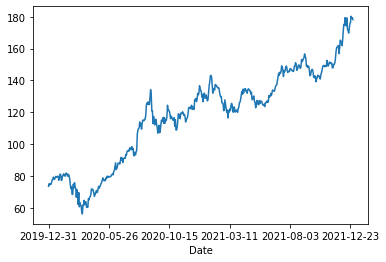

In [21]:
import matplotlib.pyplot as plt

# Set the date column as the index
df.set_index('Date', inplace=True)

# Plot the 'Close' column
df['Close'].plot()

# Show the plot
plt.show()

## Predicting Stock Closing Price

Suppose we want to predict the daily closing price of a particular stock based on its historical prices. We can train a CNN on a sequence of historical prices and use it to predict the next day's closing price. Here's some sample code that shows how this might be done:

In [22]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, GlobalMaxPooling1D

In [23]:
# Convert the closing prices to a numpy array
closing_prices = df['Close'].values
print(len(closing_prices))

505


In [24]:
# Define the length of the input sequence and the number of output classes
seq_length  = 30
num_classes = 1

In [25]:
# Construct the training data
X_train = []
y_train = []
for i in range(seq_length, len(closing_prices) - 1):
    X_train.append(closing_prices[i - seq_length:i])
    y_train.append(closing_prices[i + 1])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [26]:
print(X_train.shape)
print(y_train.shape)

(474, 30)
(474,)


In [27]:
X_train[0]

array([73.41249847, 75.08750153, 74.35749817, 74.94999695, 74.59750366,
       75.79750061, 77.40750122, 77.58249664, 79.23999786, 78.16999817,
       77.83499908, 78.80999756, 79.68250275, 79.14250183, 79.42500305,
       79.80750275, 79.57749939, 77.23750305, 79.42250061, 81.08499908,
       80.96749878, 77.37750244, 77.16500092, 79.71250153, 80.36250305,
       81.30249786, 80.00749969, 80.38749695, 79.90249634, 81.80000305])

In [28]:
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, num_classes)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 64)            256       
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 64)            12352     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 8, 64)            0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 128)            24704     
                                                                 
 conv1d_3 (Conv1D)           (None, 4, 128)            49280     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                         

In [29]:
# Train the model
model.fit(X_train, y_train, epochs=10000, batch_size=32)

Epoch 1/10000
15/15 [==============================] - 1s 8ms/step - loss: 6700.2715
Epoch 2/10000
15/15 [==============================] - 0s 7ms/step - loss: 479.9174
Epoch 3/10000
15/15 [==============================] - 0s 9ms/step - loss: 205.4891
Epoch 4/10000
15/15 [==============================] - 0s 7ms/step - loss: 92.3229
Epoch 5/10000
15/15 [==============================] - 0s 7ms/step - loss: 77.9640
Epoch 6/10000
15/15 [==============================] - 0s 7ms/step - loss: 75.6433
Epoch 7/10000
15/15 [==============================] - 0s 10ms/step - loss: 74.5412
Epoch 8/10000
15/15 [==============================] - 0s 12ms/step - loss: 74.7080
Epoch 9/10000
15/15 [==============================] - 0s 13ms/step - loss: 74.5422
Epoch 10/10000
15/15 [==============================] - 0s 9ms/step - loss: 74.0575
Epoch 11/10000
15/15 [==============================] - 0s 7ms/step - loss: 74.5985
Epoch 12/10000
15/15 [==============================] - 0s 7ms/step - loss: 78

KeyboardInterrupt: 

In [ ]:
# Use the model to predict the next day's closing price
last_seq = closing_prices[-seq_length:]
prediction = model.predict(np.array([last_seq]))
print('The predicted closing price is:', prediction)

In [ ]:
print(last_seq)

In [ ]:
print(np.mean(last_seq))

In [ ]:
data = yf.download(tickers, start="2022-01-03", end="2022-01-31")
data

In this example, we first load the historical stock prices from a CSV file. We then define the length of the input sequence (30 days, in this case) and the number of output classes (1, since we are predicting a single value). We construct the training data by using a sliding window approach to create input/output pairs from the historical prices.

We then construct a CNN model with several convolutional layers and dense layers, and compile it using the mean squared error loss function. We train the model on the training data, and then use it to predict the next day's closing price based on the most recent sequence of historical prices.

Note that this is just a simple example, and there are many ways to improve and customize this model for a particular finance-related task.

## Exercise - Predicting Change in Stock Volatility

A possible application of CNNs in financial risk management is to predict changes in financial market volatility. Here's an example of how you could use a CNN to predict volatility changes:

In [16]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [17]:
# Load historical stock price data for a given stock
data = pd.read_csv('stock_prices.csv')

In [18]:
# Calculate the daily log returns and the corresponding volatility
data['Log Returns'] = data['Adj Close'].pct_change(-1)   #np.log(data['Adj Close']) - np.log(data['Adj Close'].shift(1))
data = data.dropna()

In [19]:
data['Volatility']  = data['Log Returns'].rolling(window=5).std() * np.sqrt(252)

In [20]:
# Normalize the volatility data
scaler = MinMaxScaler()
data['Normalized Volatility'] = scaler.fit_transform(data['Volatility'].values.reshape(-1, 1))
data = data.dropna()

In [21]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Log Returns,Volatility,Normalized Volatility
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970085,108872000,-0.015832,0.214596,0.104649
5,2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143898,132079200,-0.020799,0.207665,0.100589
6,2020-01-09,76.809998,77.607498,76.550003,77.407501,75.718788,170108400,-0.002256,0.162517,0.074142
7,2020-01-10,77.650002,78.167503,77.062500,77.582497,75.889961,140644800,-0.020917,0.184695,0.087133
8,2020-01-13,77.910004,79.267502,77.787498,79.239998,77.511284,121532000,0.013688,0.236511,0.117486


In [22]:
# Define the size of the input and output sequences
N = 30
K = 1

In [23]:
# Create input and output sequences by taking a sliding window of past volatility values
X, Y = [], []
for i in range(N, len(data)):
    x_i = data['Normalized Volatility'].values[(i-N):i]
    y_i = data['Normalized Volatility'].values[i:(i+K)]
    X.append(x_i)
    Y.append(y_i)
X, Y = np.array(X), np.array(Y)

In [24]:
# Split the data into training and testing sets
split = int(0.8 * len(data))
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

In [25]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

In [26]:
# Train the model on the training set
model.fit(X_train, Y_train, epochs=50, batch_size=16)

Epoch 1/50
25/25 [==============================] - 1s 4ms/step - loss: 0.0186
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0132
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0122
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0115
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 0.0106
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0099
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 0.0094
Epoch 8/50
25/25 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 9/50
25/25 [==============================] - 0s 5ms/step - loss: 0.0094
Epoch 10/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0082
Epoch 11/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0078
Epoch 12/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0076
Epoch 13/50
25/25 [==============================

### Does it Work?

In [27]:
# Evaluate the performance of the CNN on the testing set
test_loss = model.evaluate(X_test, Y_test)
print("Test loss:", test_loss)

3/3 [==============================] - 0s 4ms/step - loss: 0.0033
Test loss: 0.0033224106300622225


In [28]:
# Make predictions on new, unseen data
X_new = np.array([data['Normalized Volatility'].values[-N:]])
y_pred = model.predict(X_new)
y_pred = scaler.inverse_transform(y_pred)[0][0]
print("Predicted volatility change:", y_pred)

Predicted volatility change: 0.31403893
